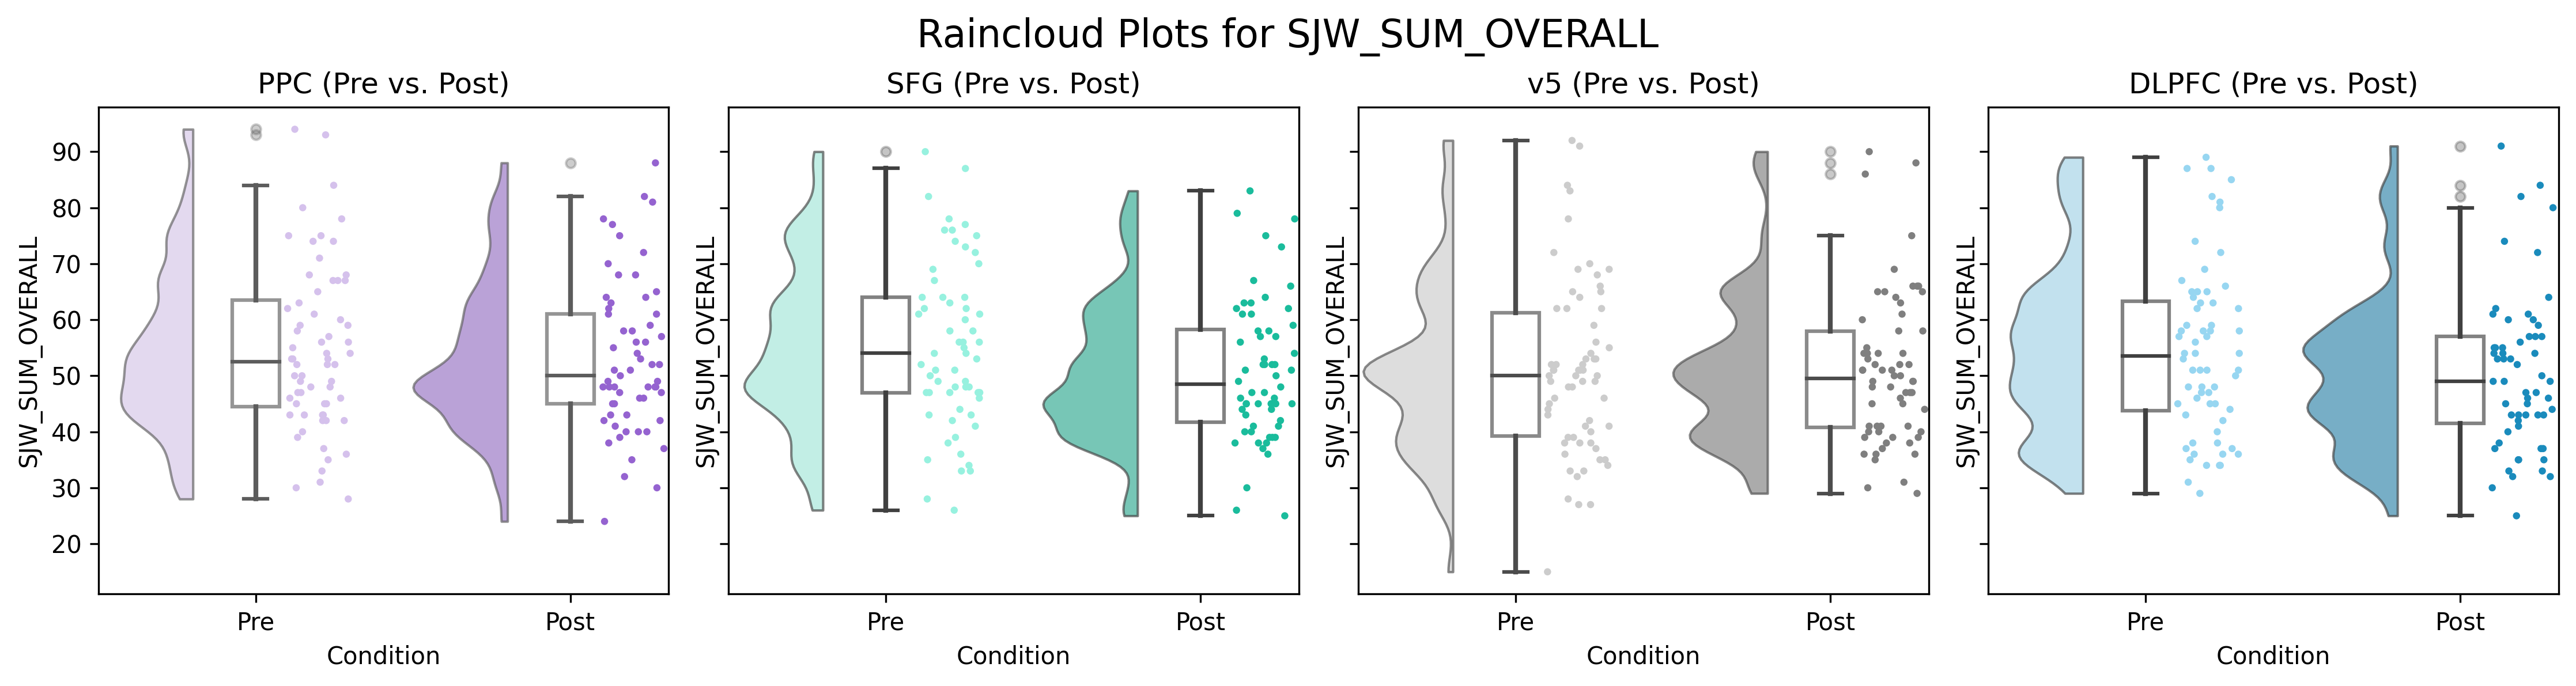

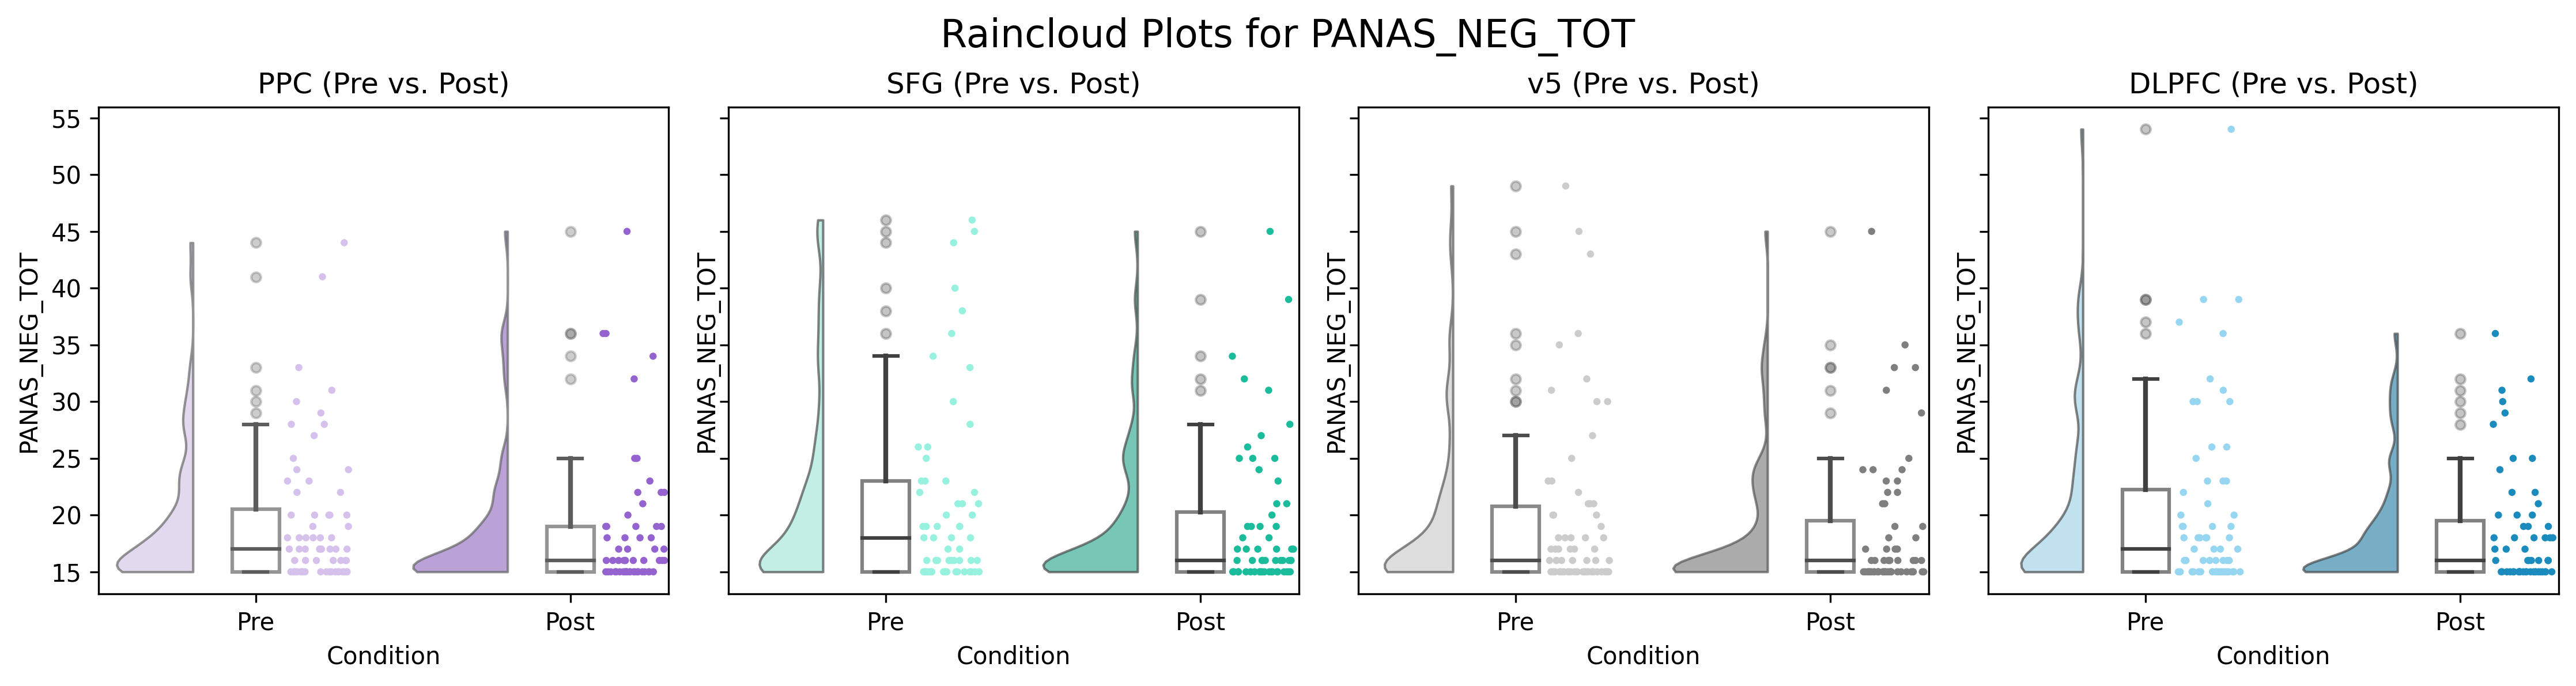

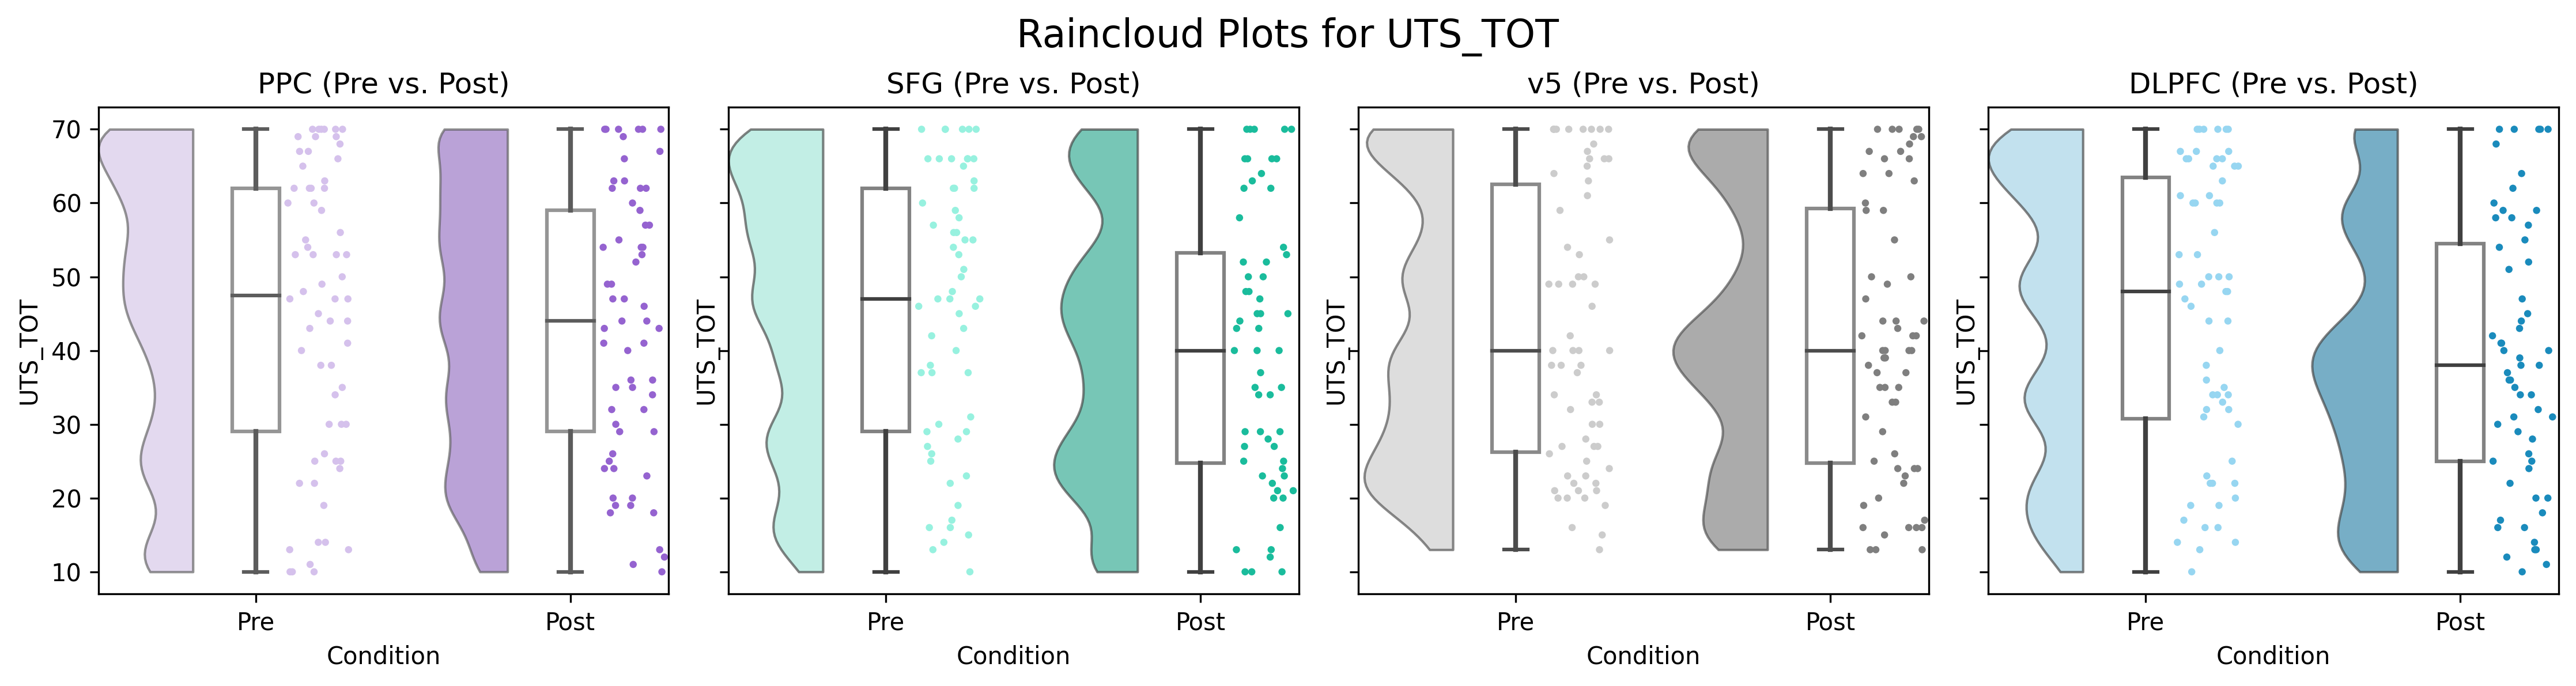

In [8]:
# these raincloud plots had to be plotted in their own notebook due to a versioning conflict. if you are
# trying to recreate this, you'll need to deprecate seaborn to 0.11.0. this version
# also sets numpy = 1.23.5 and matplotlib = 3.3.0. 

import ptitprince as pt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys

# Load the main data
file_path = '/u/home/n/npeterse/TMS_data_copy.csv'  # Adjust this path to your actual data file
data = pd.read_csv(file_path)
dvs = ['SJW_SUM_OVERALL', 'PANAS_NEG_TOT', 'UTS_TOT']
targets = ['PPC', 'SFG', 'v5', 'DLPFC']

# Ensure 'STITARGET' and 'PrePost' exist and there's no missing data
data_clean = data.dropna(subset=['STITARGET', 'PrePost'] + dvs)

# Function to lighten colors
def lighten_color(color, amount=0.5):
    rgb = mcolors.to_rgb(color)
    hls = colorsys.rgb_to_hls(*rgb)
    lightened_hls = (hls[0], min(1, hls[1] + amount * (1 - hls[1])), hls[2])
    return mcolors.to_hex(colorsys.hls_to_rgb(*lightened_hls))

# set colors
target_colors = {
    'SFG': '#1ABC9C', 
    'DLPFC': '#1A8BBC',
    'PPC': '#9563d0', 
    'v5': '#7f7f7f'  
}

palette = {
    'SFG_Pre': lighten_color(target_colors['SFG'], amount=0.6),
    'SFG_Post': target_colors['SFG'],
    'DLPFC_Pre': lighten_color(target_colors['DLPFC'], amount=0.6),
    'DLPFC_Post': target_colors['DLPFC'],
    'PPC_Pre': lighten_color(target_colors['PPC'], amount=0.6),
    'PPC_Post': target_colors['PPC'],
    'v5_Pre': lighten_color(target_colors['v5'], amount=0.6),
    'v5_Post': target_colors['v5']
}

# Loop through each DV to create a plot for each one
for dv in dvs:
    # Set up a smaller figure size for multiple plots
    fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True, dpi=300)
    
    # Loop through each target and create a raincloud plot for that target
    for ax, target in zip(axes, targets):
        data_target = data_clean[(data_clean['STITARGET'] == target) & data_clean['PrePost'].notna()]
        
        # Create the raincloud plot
        pt.RainCloud(x='PrePost', y=dv, data=data_target, 
                     palette=[palette[f'{target}_Pre'], palette[f'{target}_Post']],
                     bw=.2, width_viol=.6, ax=ax, orient="v", 
                     alpha=.65, dodge=False, move=0.2,
                     box_showfliers=True, box_flierprops=dict(marker='o', color='black', alpha=0.3, markersize=4))
        
        # Set title and labels for each subplot
        ax.set_title(f'{target} (Pre vs. Post)', fontsize=12)
        ax.set_xlabel("Condition")
        if ax == axes[0]:  # Only the first subplot needs a ylabel
            ax.set_ylabel(dv)

    # Set a common title for the entire figure
    fig.suptitle(f'Raincloud Plots for {dv}', fontsize=16)
    
    # Adjust the layout to avoid overlapping labels
    plt.tight_layout()
    plt.subplots_adjust(top=0.85) 
    plt.show()
